longitude 844
latitude 862
housing_median_age 52
total_rooms 5926
total_bedrooms 1923
population 3888
households 1815
median_income 12928
median_house_value 3842
ocean_proximity 5


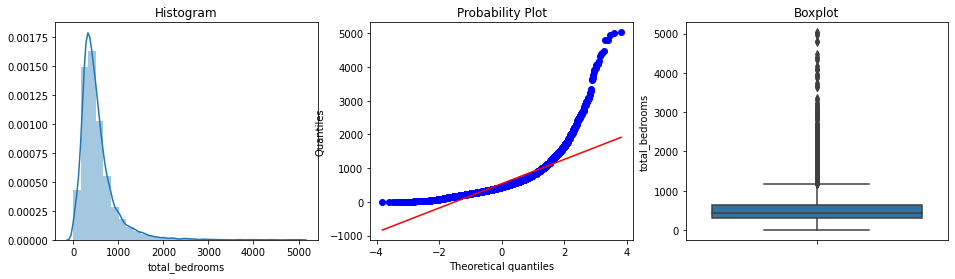

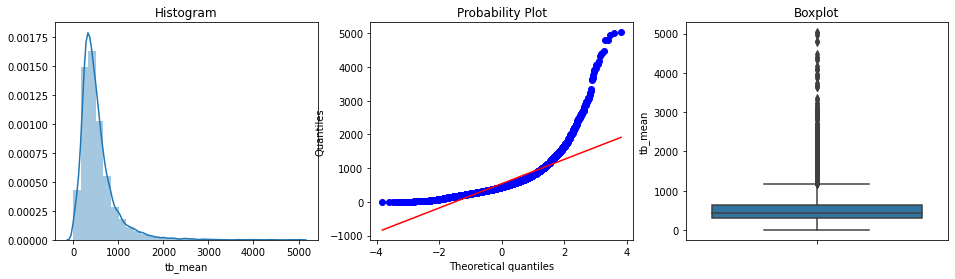

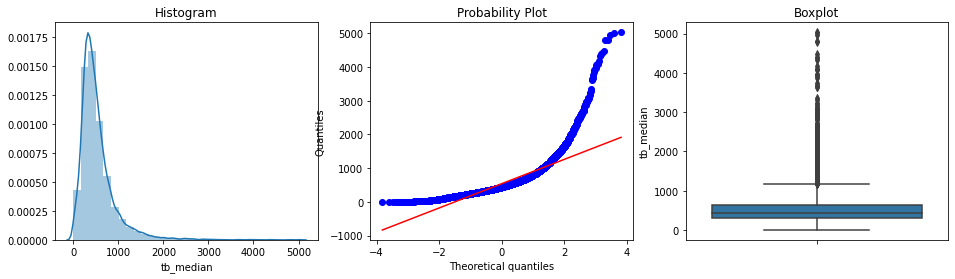

longitude 783
latitude 789
housing_median_age 52
total_rooms 4531
total_bedrooms 1592
population 3125
households 1513
median_income 7566
ocean_proximity 5


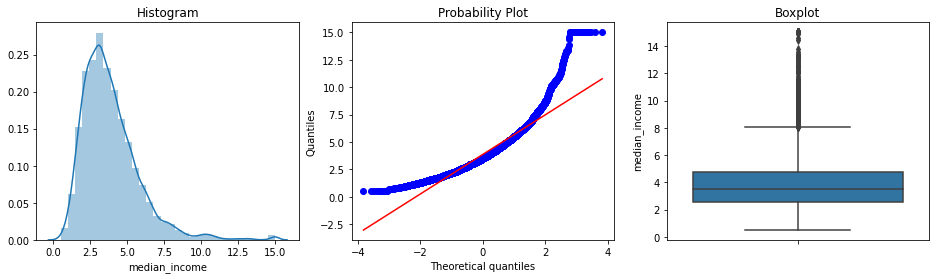

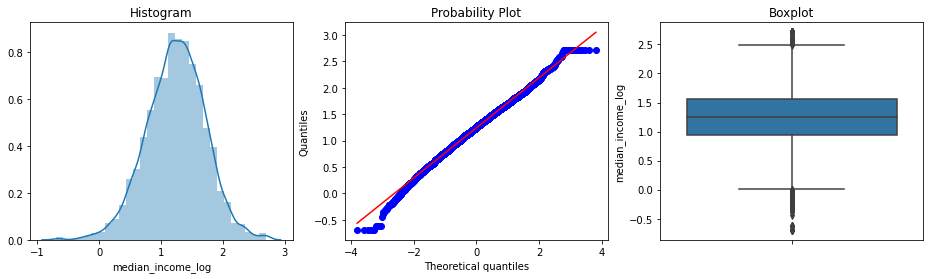

Logarithmic



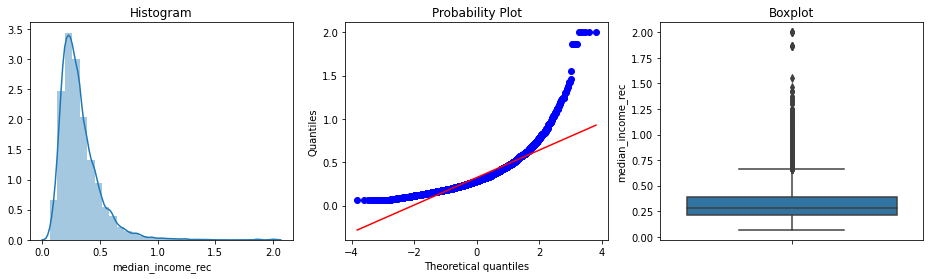

Reciprocal



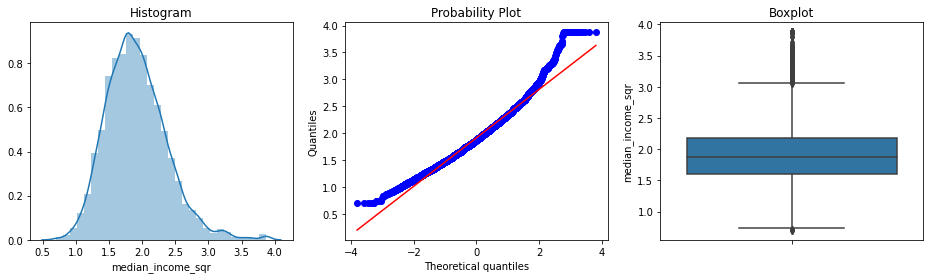

SquareRoot



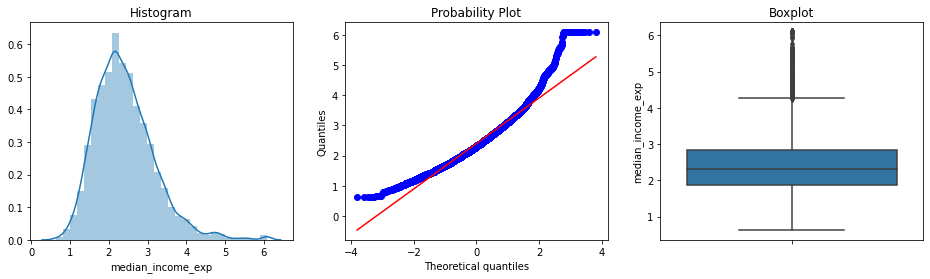

Exponential

Optimal λ:  0.09545042243593573


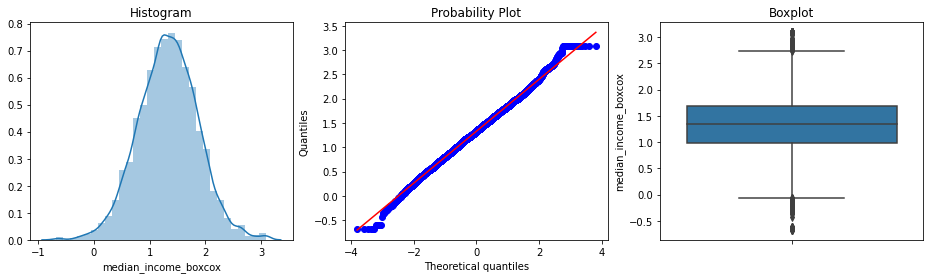

Boxcox

Optimal λ:  -0.1925634117054678


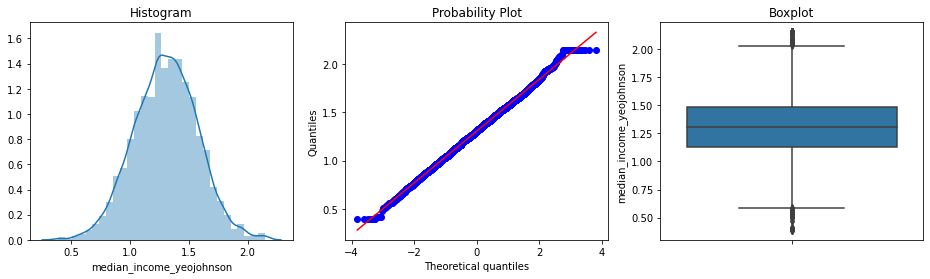

YeoJohnson



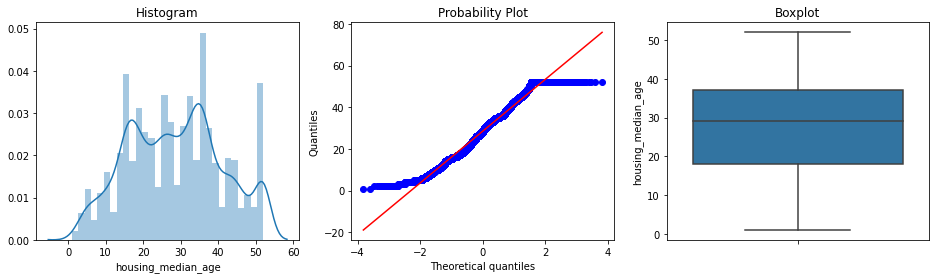

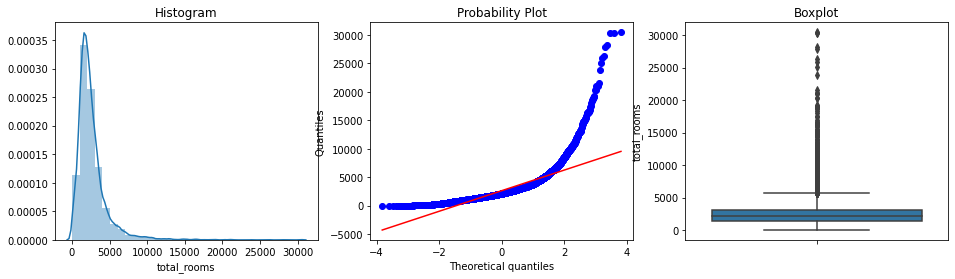

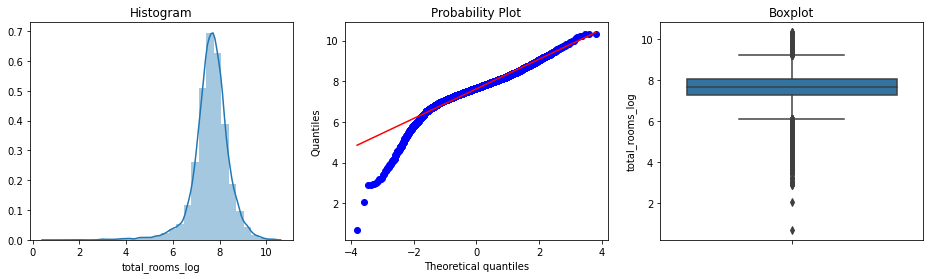

Logarithmic



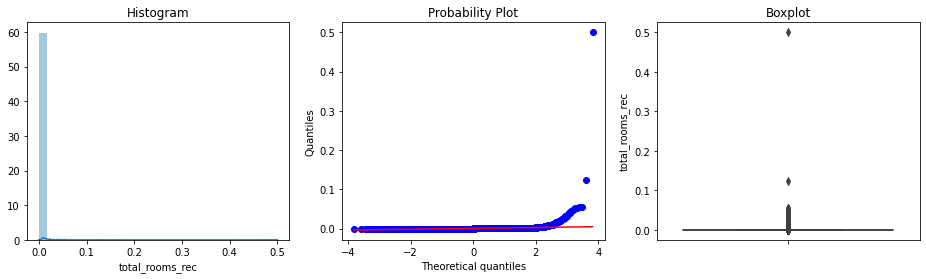

Reciprocal



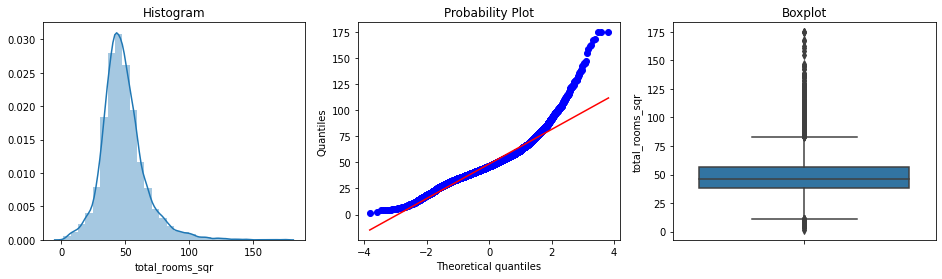

SquareRoot



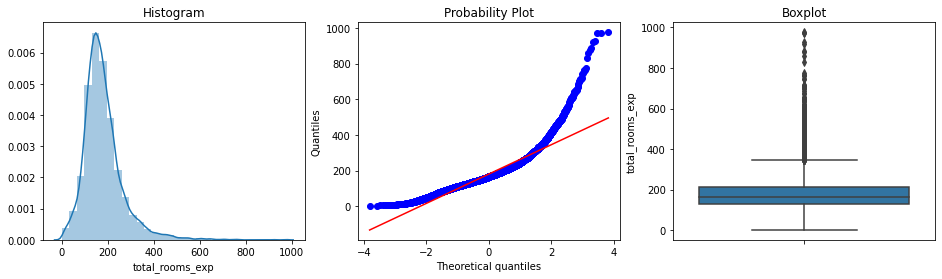

Exponential

Optimal λ:  0.2301368493888358


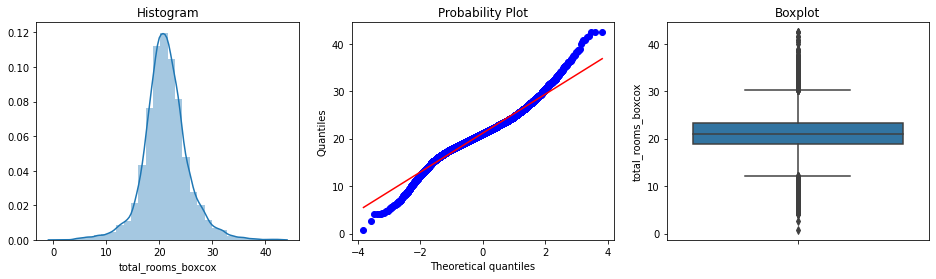

Boxcox

Optimal λ:  0.22859969547409698


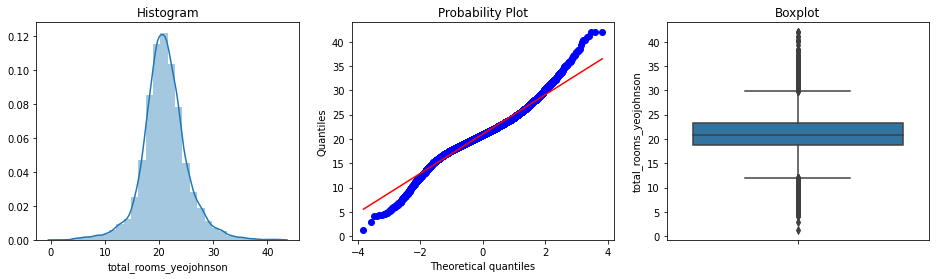

YeoJohnson



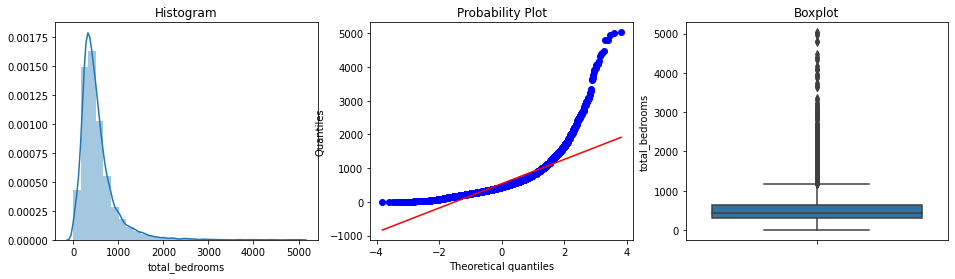

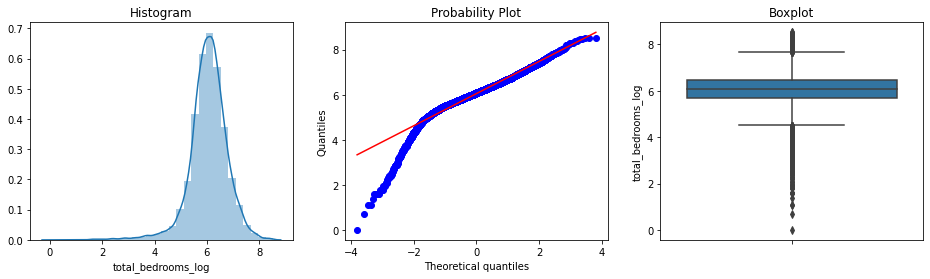

Logarithmic



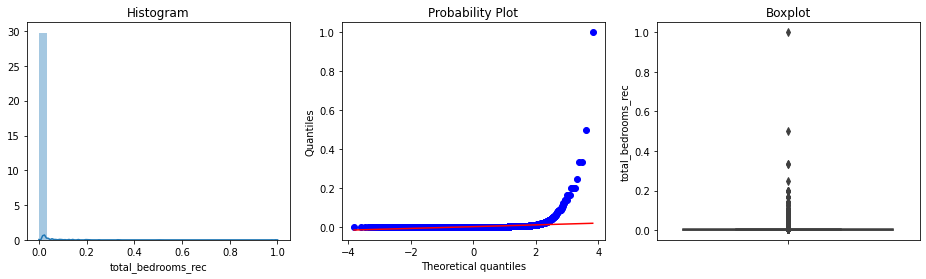

Reciprocal



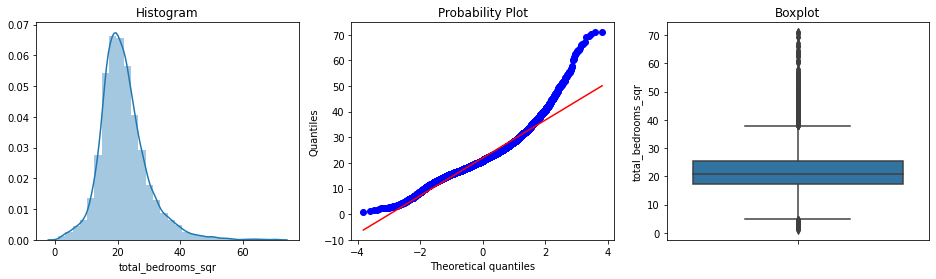

SquareRoot



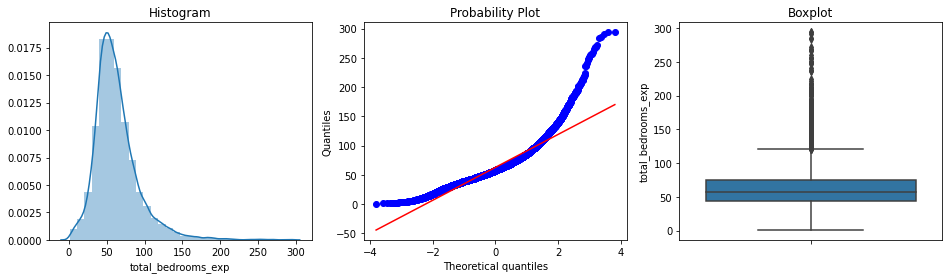

Exponential

Optimal λ:  0.23398867792184003


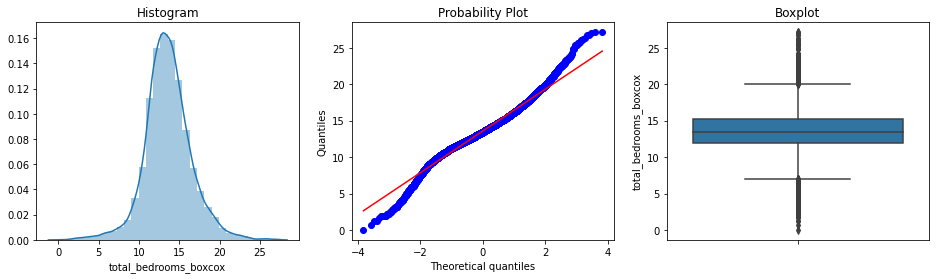

Boxcox

Optimal λ:  0.2276234965261348


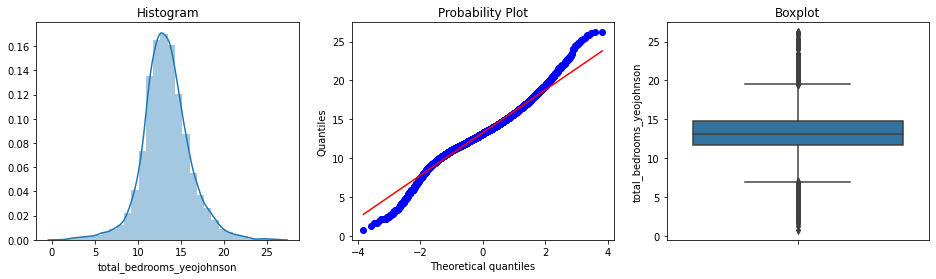

YeoJohnson



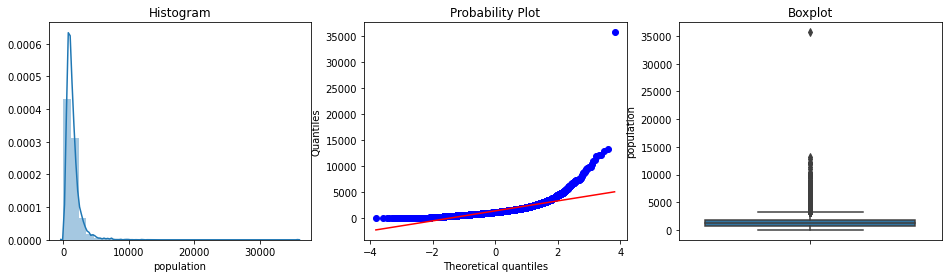

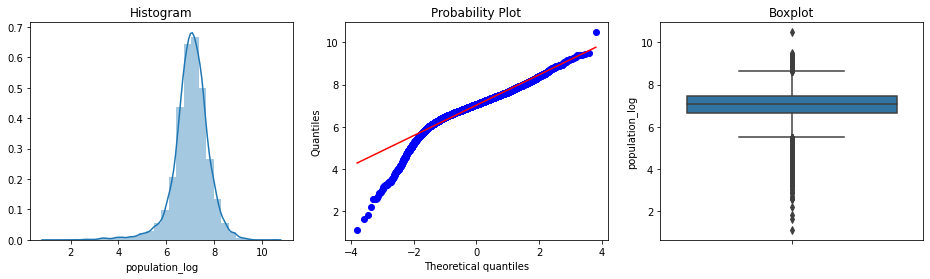

Logarithmic



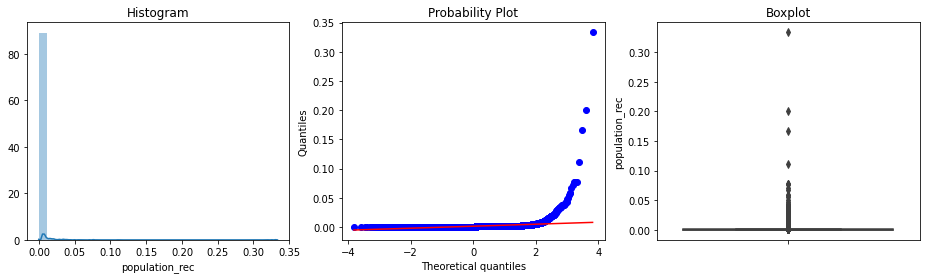

Reciprocal



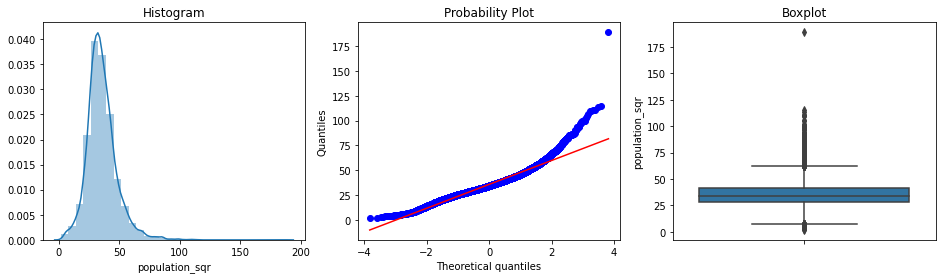

SquareRoot



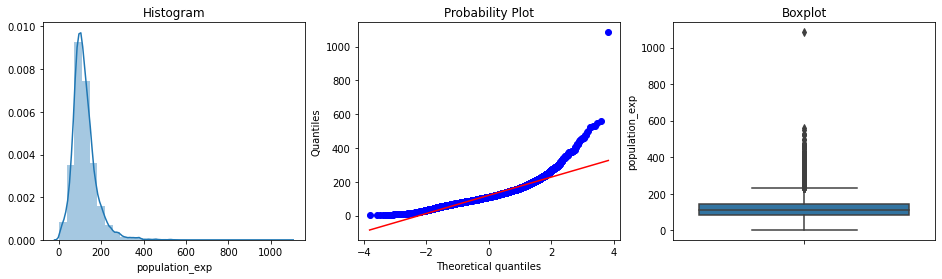

Exponential

Optimal λ:  0.24550027357729576


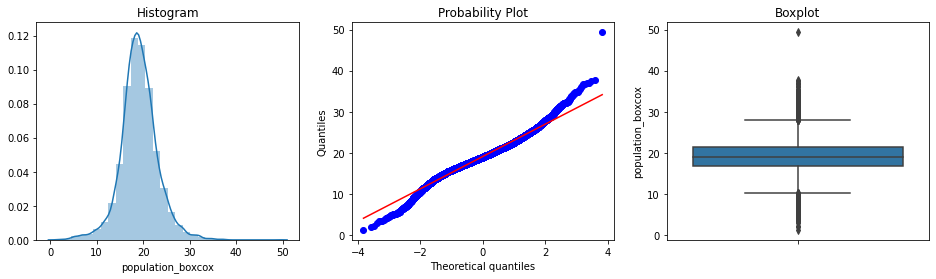

Boxcox

Optimal λ:  0.24325674692686777


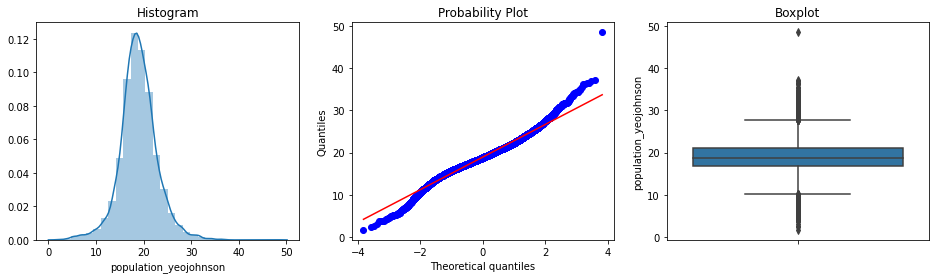

YeoJohnson



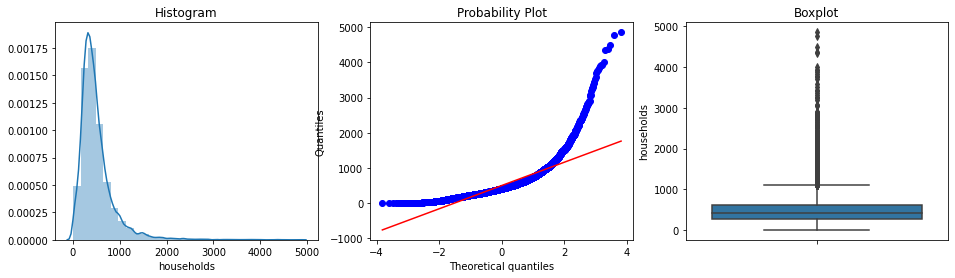

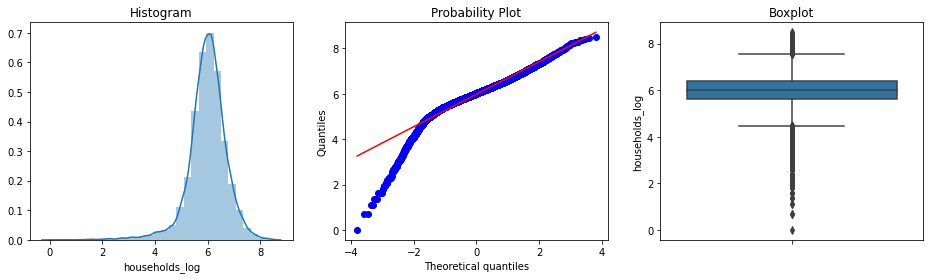

Logarithmic



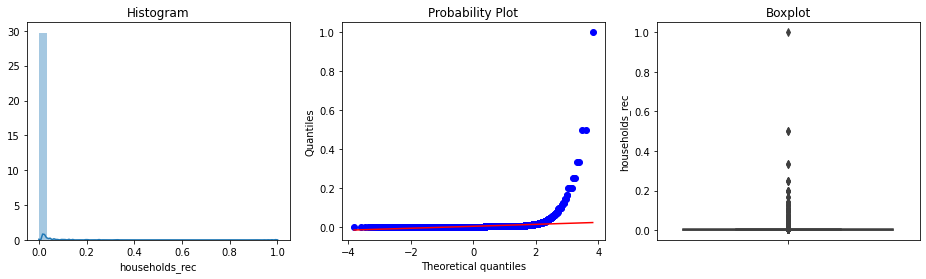

Reciprocal



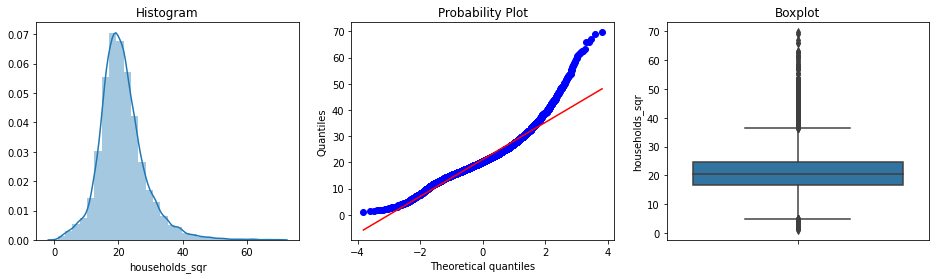

SquareRoot



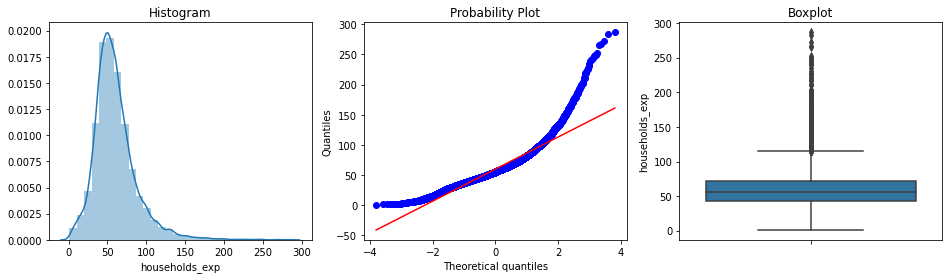

Exponential

Optimal λ:  0.25595784327058857


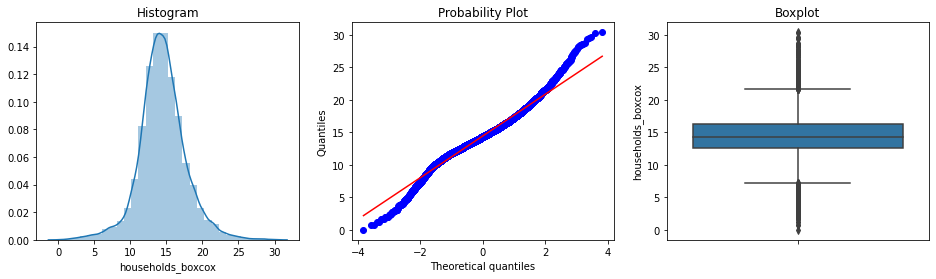

Boxcox

Optimal λ:  0.249617642056993


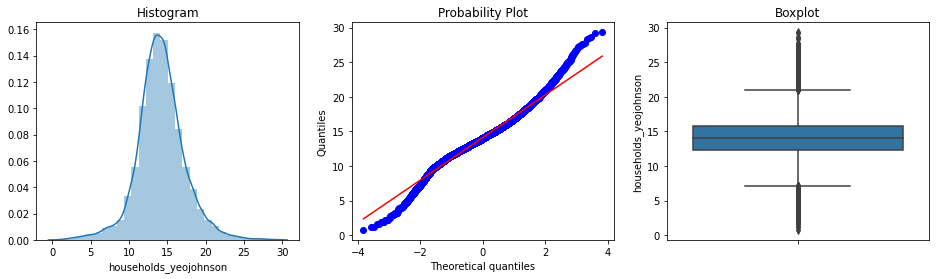

YeoJohnson



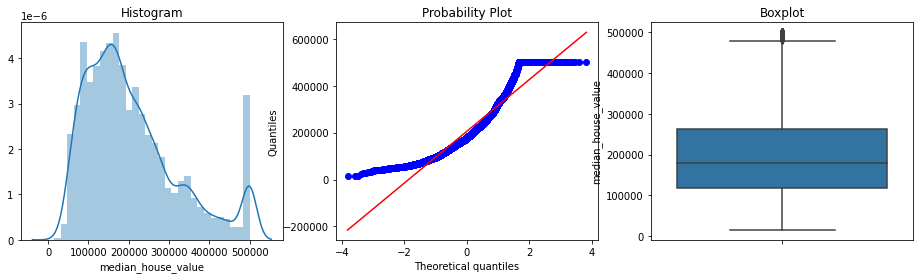

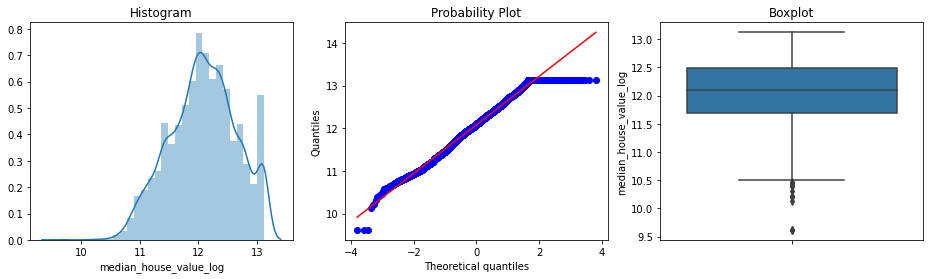

Logarithmic



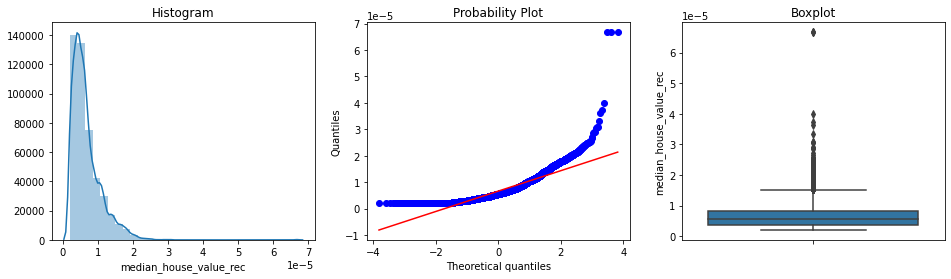

Reciprocal



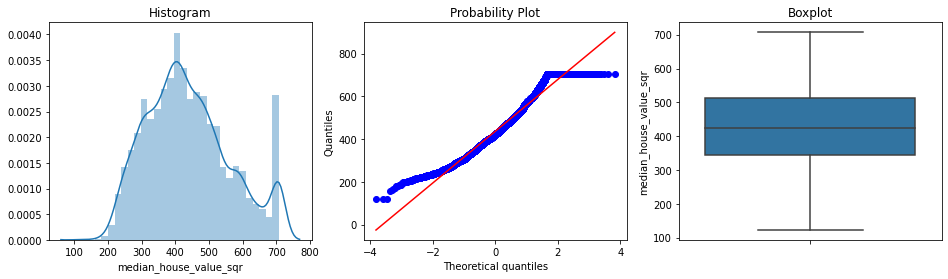

SquareRoot



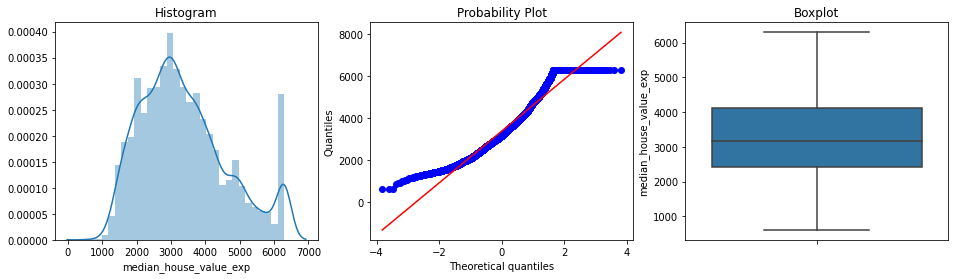

Exponential

Optimal λ:  0.12033490255058749


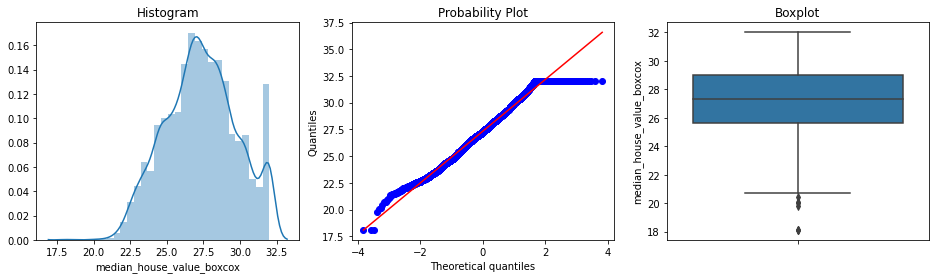

Boxcox

Optimal λ:  0.12032930282442808


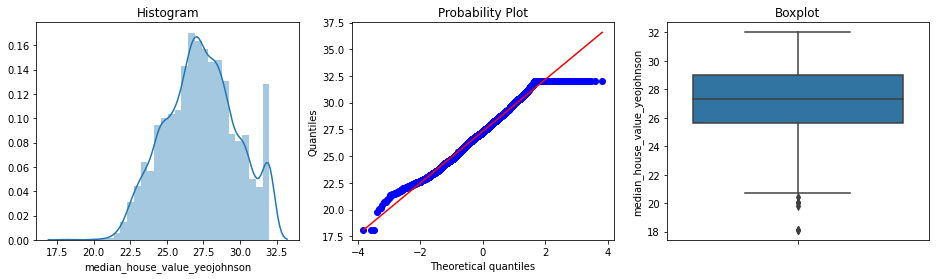

YeoJohnson



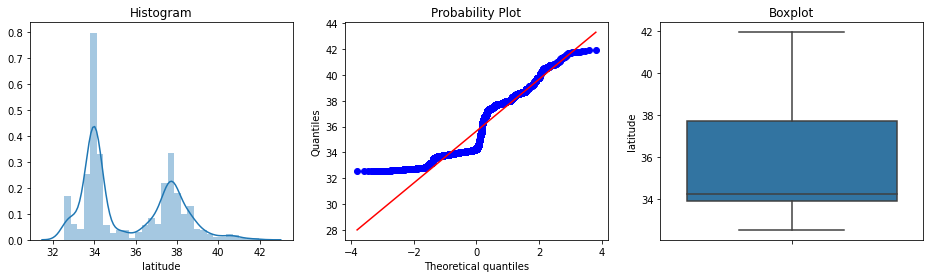

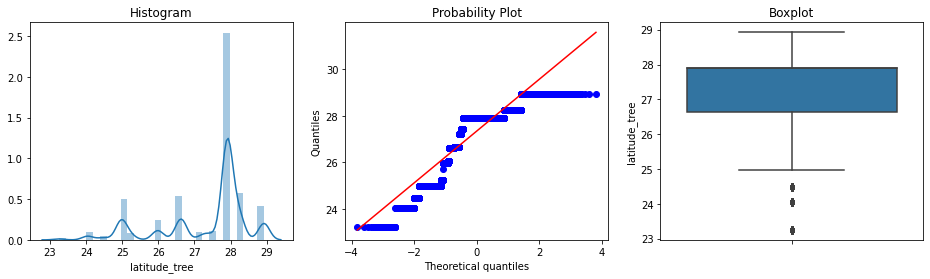

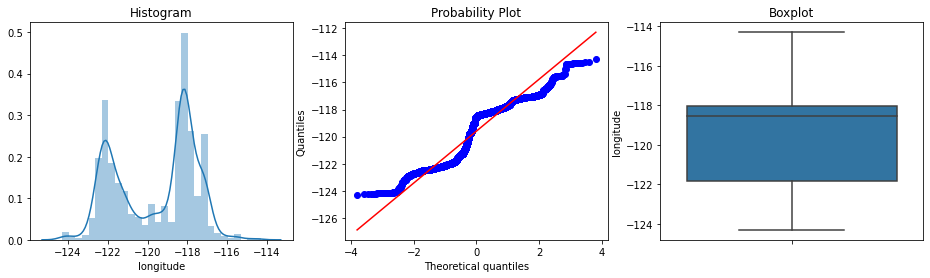

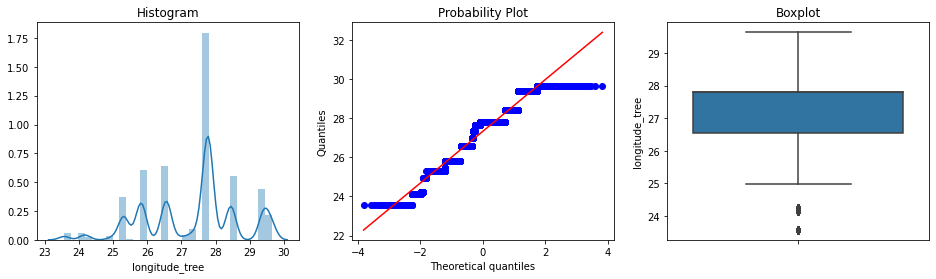

INLAND 



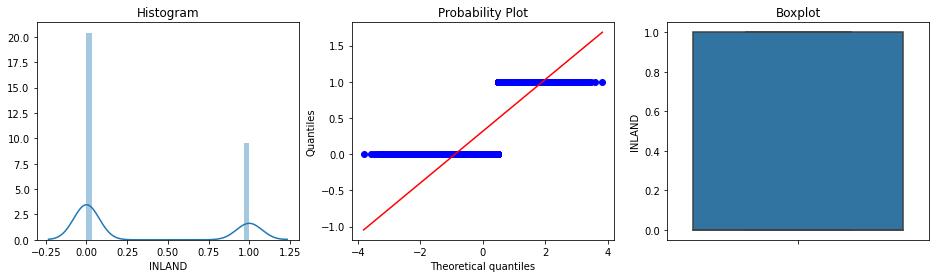

ISLAND 



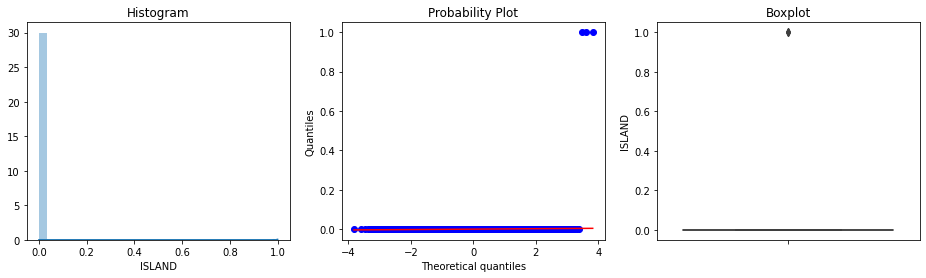

NEAR BAY 



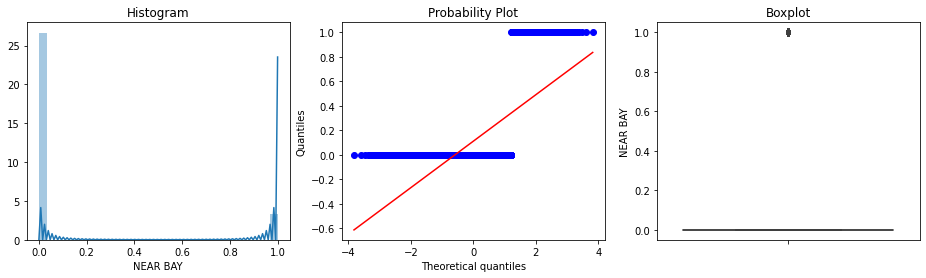

NEAR OCEAN 



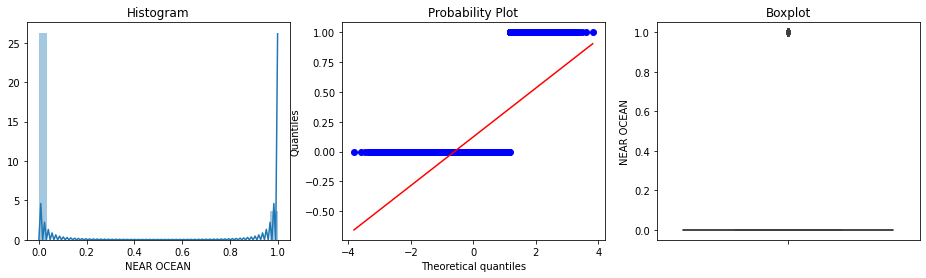

housing_median_age 



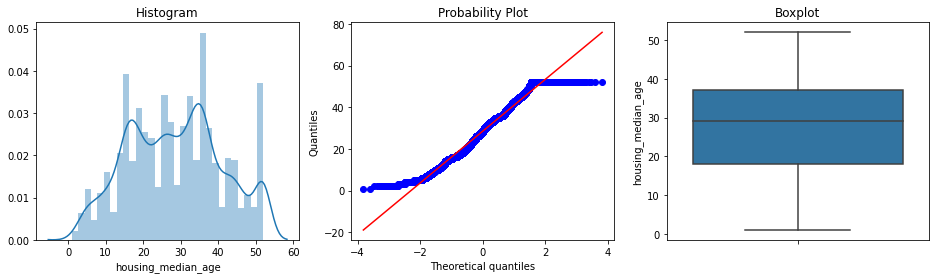

total_rooms 



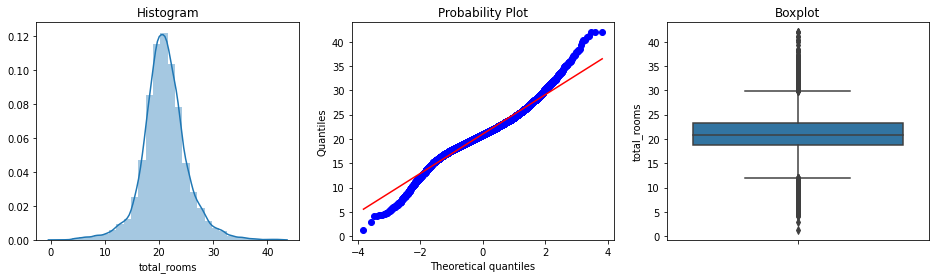

total_bedrooms 



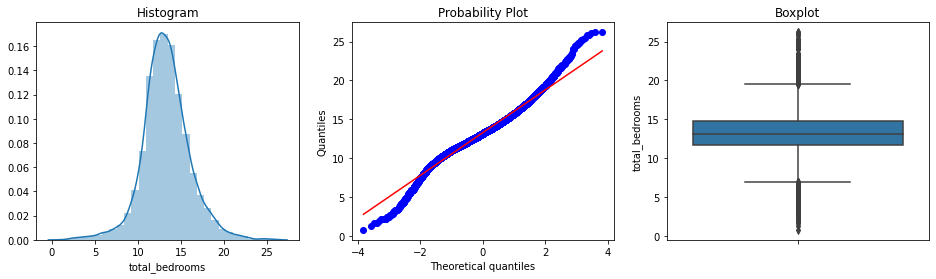

population 



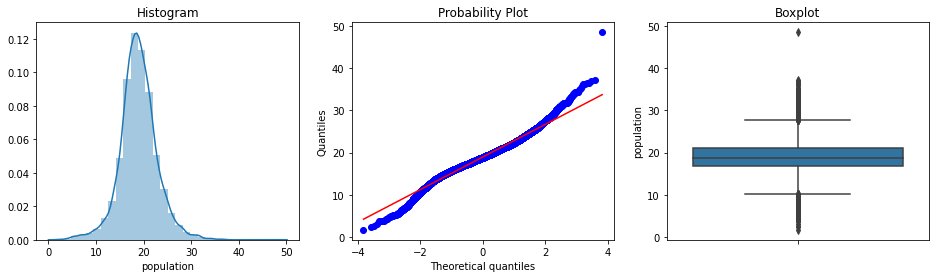

households 



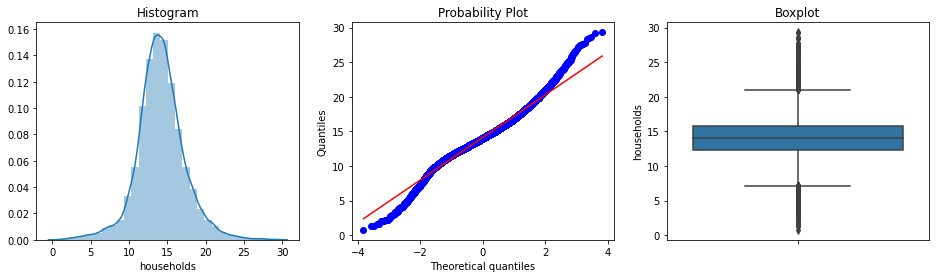

median_income 



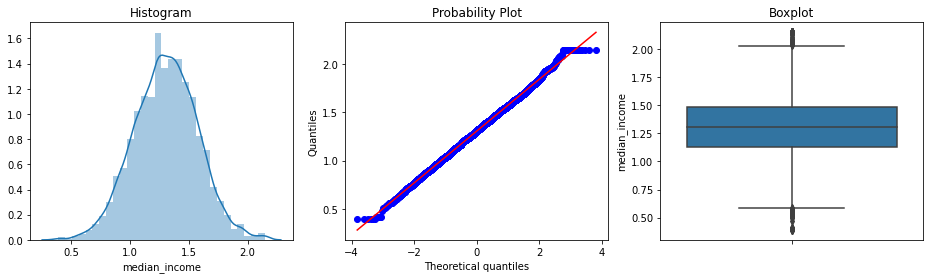

latitude_tree 



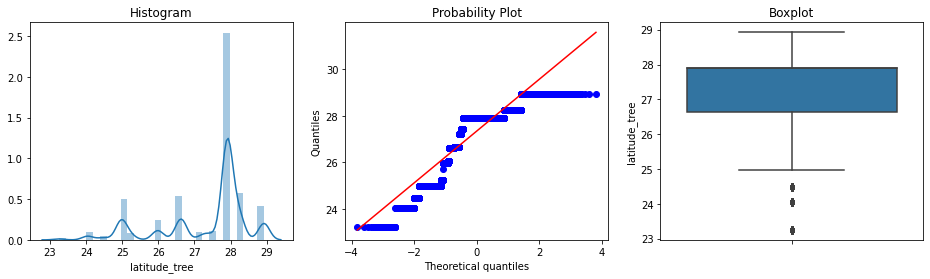

longitude_tree 



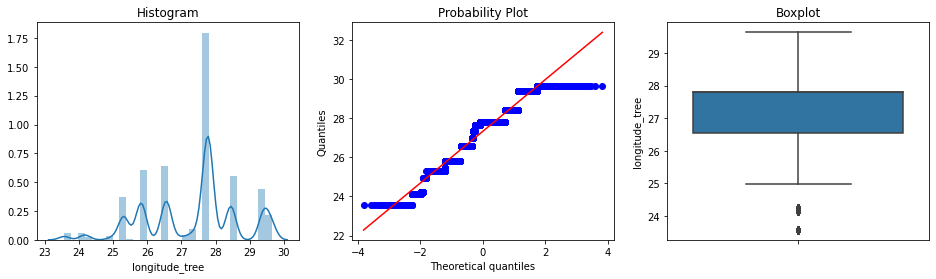

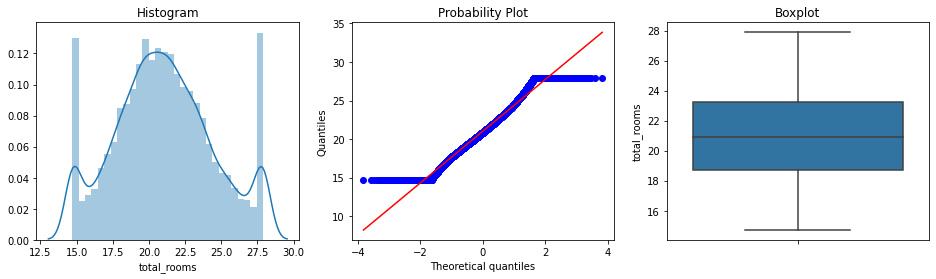

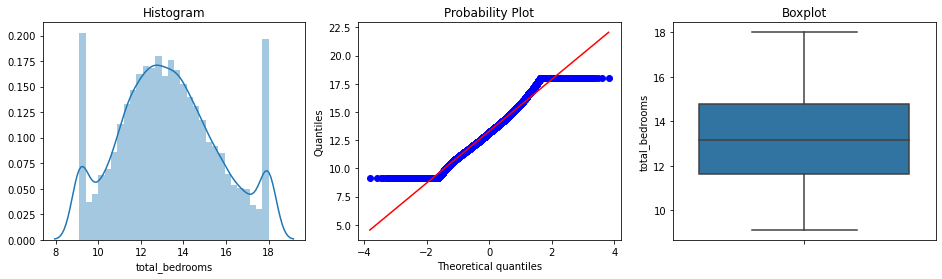

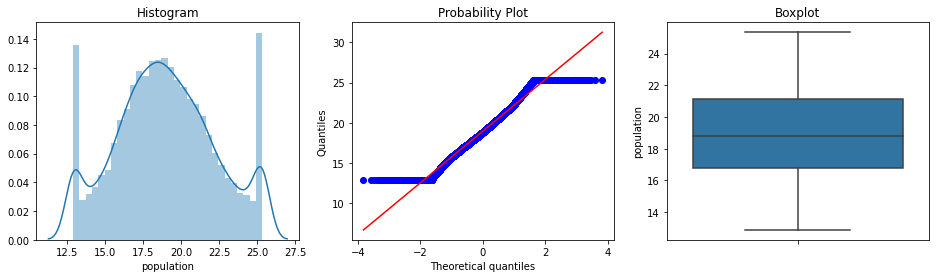

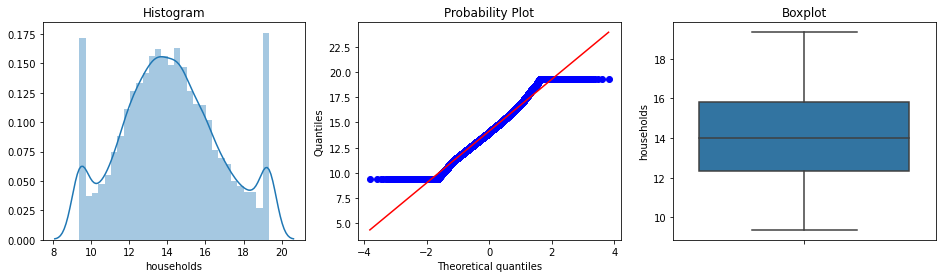

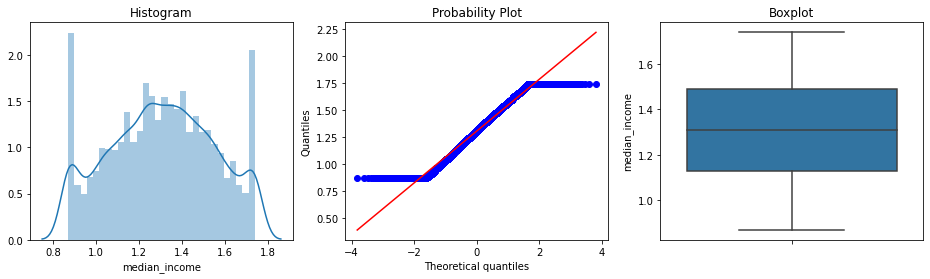

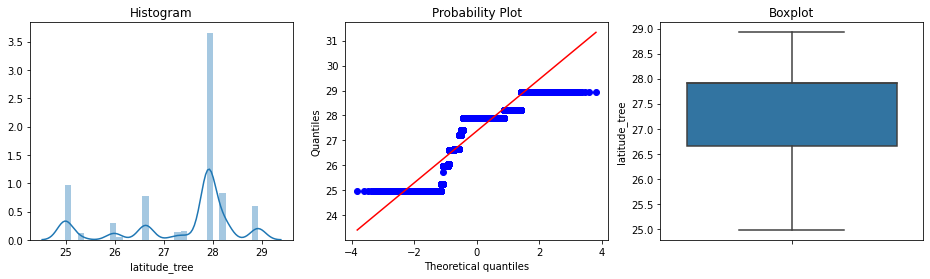

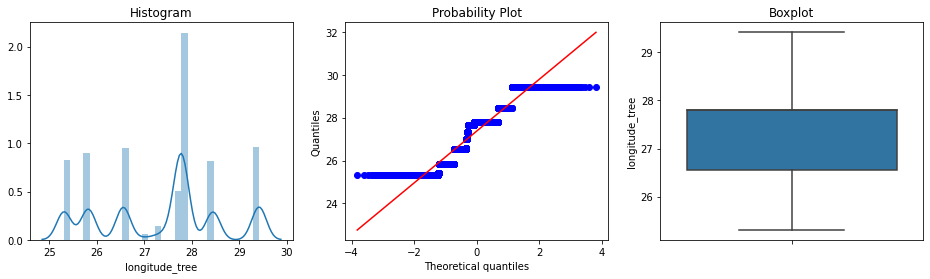

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     2229.
Date:                Sun, 05 Apr 2020   Prob (F-statistic):               0.00
Time:                        04:55:43   Log-Likelihood:                -17225.
No. Observations:               10320   AIC:                         3.448e+04
Df Residuals:                   10307   BIC:                         3.457e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0521      0.443      6.883      0.000       2.183       3.921
x1            -1.2410      0.038    -32.445      0.000      -1.316      -1.166
x2             2.6566      0.744      3.573      0.000       1.199       4.114
x3            -0.2590      0.044     -5.840      0.000      -0.346      -0.172
x4             0.4194      0.043      9.828      0.000       0.336       0.503
x5             0.0123      0.001     10.374      0.000       0.010       0.015
x6            -0.0532      0.016     -3.401      0.001      -0.084      -0.023
x7             0.2998      0.033      9.203      0.000       0.236       0.364
x8            -0.3361      0.010    -33.526      0.000      -0.356      -0.316
x9             0.2529      0.028      9.094      0.000       0.198       0.307
x10            5.5798      0.091     61.513      0.000       5.402       5.758
x11            0.3156      0.014     23.189      0.000       0.289       0.342
x12            0.3039      0.014     21.985      0.000       0.277       0.331
==============================================================================
Omnibus:                      816.219   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2476.761
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                       5.255   Cond. No.                     3.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

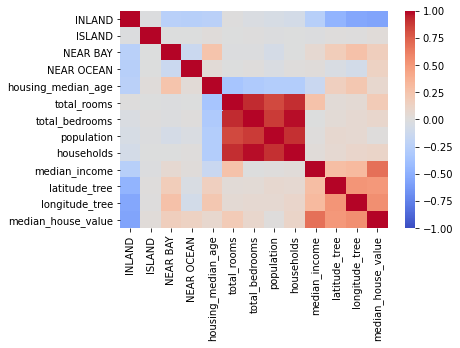

In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random
random.seed(0)

#importing dataset
dataset=pd.read_csv('housing.csv')

abc=list(dataset.columns)
for c in abc :
    print(c,dataset[c].nunique())
  
dataset.describe()
dataset.dtypes
dataset.isnull().mean()

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset.iloc[:,[0,1,2,3,4,5,6,7,9]],
dataset.iloc[:,[8]],test_size=0.50,random_state=42)

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()
    
xtr=pd.DataFrame()

#1. Dealing with MISSING DATA
mean=x_train.total_bedrooms.mean()
xtr['tb_mean']=x_train['total_bedrooms'].fillna(mean)
median=x_train.total_bedrooms.median()
xtr['tb_median']=x_train['total_bedrooms'].fillna(median)

diagnostic_plots(x_train, 'total_bedrooms')
diagnostic_plots(xtr, 'tb_mean')
diagnostic_plots(xtr, 'tb_median')

x_train['total_bedrooms']=xtr['tb_mean']
x_test.total_bedrooms=x_test.total_bedrooms.fillna(mean)

#2. Dealing with Categorical Data

abc=list(x_train.columns)
for c in abc :
    print(c,x_train[c].nunique())
    
#ordinal encoding to have a monotonic relationship b/w the categorical variable & target variable
   
dummy=pd.get_dummies(x_train.ocean_proximity,drop_first=True)
x_train=pd.concat([dummy,x_train],axis=1)
x_train=x_train.drop(['ocean_proximity'],axis=1)
dummy=pd.DataFrame()
dummy=pd.get_dummies(x_test.ocean_proximity,drop_first=True)
x_test=pd.concat([dummy,x_test],axis=1)
x_test=x_test.drop(['ocean_proximity'],axis=1)

#3. Numerical Variable Transformation

def select_vtm(df1,df2,var):
    df2[var+'_log'] = np.log(df1[var])
    diagnostic_plots(df2, var+'_log')
    print('Logarithmic\n')
    

    df2[var+'_rec'] = 1 / (df1[var]) 
    diagnostic_plots(df2, var+'_rec')
    print('Reciprocal\n')
    
    df2[var+'_sqr'] = df1[var]**(1/2) 
    diagnostic_plots(df2,var+'_sqr')
    print('SquareRoot\n')

    df2[var+'_exp'] = df1[var]**(1/1.5) 
    diagnostic_plots(df2, var+'_exp')
    print('Exponential\n')

    df2[var+'_boxcox'], param = stats.boxcox(df1[var]) 
    print('Optimal λ: ', param)
    diagnostic_plots(df2, var+'_boxcox')
    print('Boxcox\n')

    df2[var+'_yeojohnson'], param = stats.yeojohnson(df1[var].
                                                    astype('float')) 
    print('Optimal λ: ', param)
    diagnostic_plots(df2, var+'_yeojohnson')  
    print("YeoJohnson\n")

xtr=pd.DataFrame()

diagnostic_plots(x_train, 'median_income')
select_vtm(x_train,xtr,'median_income')
x_train['median_income']=xtr['median_income_yeojohnson']
x_test['median_income'],param=stats.yeojohnson(x_test['median_income']
                                               .astype('float'))


diagnostic_plots(x_train, 'housing_median_age')

diagnostic_plots(x_train, 'total_rooms')
select_vtm(x_train,xtr,'total_rooms')
x_train['total_rooms']=xtr['total_rooms_yeojohnson']
x_test['total_rooms'],param=stats.yeojohnson(x_test['total_rooms']
                                               .astype('float'))

diagnostic_plots(x_train, 'total_bedrooms')
select_vtm(x_train,xtr,'total_bedrooms')
x_train['total_bedrooms']=xtr['total_bedrooms_yeojohnson']
x_test['total_bedrooms'],param=stats.yeojohnson(x_test['total_bedrooms']
                                               .astype('float'))

diagnostic_plots(x_train, 'population')
select_vtm(x_train,xtr,'population')
x_train['population']=xtr['population_yeojohnson']
x_test['population'],param=stats.yeojohnson(x_test['population']
                                               .astype('float'))

diagnostic_plots(x_train, 'households')
select_vtm(x_train,xtr,'households')
x_train['households']=xtr['households_yeojohnson']
x_test['households'],param=stats.yeojohnson(x_test['households']
                                               .astype('float'))
xtr=pd.DataFrame()
diagnostic_plots(y_train, 'median_house_value')
select_vtm(y_train,xtr,'median_house_value')
y_train['median_house_value']=xtr['median_house_value_yeojohnson']
y_test['median_house_value'],param=stats.yeojohnson(y_test['median_house_value']
                                                    .astype('float'))

#4. Discretization of variables
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

#descritizing latitude 
scores_ls=[]
scores_ls_std=[]
xtr=pd.DataFrame()

#finding best depth of tree
for td in [1,2,3,4] :
    t_m=DecisionTreeRegressor(max_depth=td)
    scores=cross_val_score(t_m,x_train['latitude'].to_frame(),y_train,cv=5)
    scores_ls.append(np.mean(scores))
    scores_ls_std.append(np.std(scores))

xtr=pd.concat([pd.Series(scores_ls),pd.Series(scores_ls_std)],axis=1)

xtr.columns=['mean score','std_dev']

#fitting test&train set with discretized variable
tree_model=DecisionTreeRegressor(max_depth=4)
tree_model.fit(x_train['latitude'].to_frame(),y_train)
x_train['latitude_tree']=tree_model.predict(x_train['latitude'].to_frame())

diagnostic_plots(x_train,'latitude')
diagnostic_plots(x_train,'latitude_tree')

x_train=x_train.drop(['latitude'],axis=1)

x_test['latitude_tree']=tree_model.predict(x_test['latitude'].to_frame())

x_test=x_test.drop(['latitude'],axis=1)

#descritizing longitude
scores_ls=[]
scores_ls_std=[]
xtr=pd.DataFrame()

#finding best depth of tree
for td in [1,2,3,4] :
    t_m=DecisionTreeRegressor(max_depth=td)
    scores=cross_val_score(t_m,x_train['longitude'].to_frame(),y_train,cv=5)
    scores_ls.append(np.mean(scores))
    scores_ls_std.append(np.std(scores))

xtr=pd.concat([pd.Series(scores_ls),pd.Series(scores_ls_std)],axis=1)

xtr.columns=['mean score','std_dev']

#fitting test&train set with discretized variable
tree_model=DecisionTreeRegressor(max_depth=4)
tree_model.fit(x_train['longitude'].to_frame(),y_train)
x_train['longitude_tree']=tree_model.predict(x_train['longitude'].to_frame())

diagnostic_plots(x_train,'longitude')
diagnostic_plots(x_train,'longitude_tree')

x_train=x_train.drop(['longitude'],axis=1)

x_test['longitude_tree']=tree_model.predict(x_test['longitude'].to_frame())

x_test=x_test.drop(['longitude'],axis=1)

#5. Detecting Outliers

abc=list(x_train.columns)
for c in abc :
    print(c,"\n")
    diagnostic_plots(x_train,c)


def find_boundaries(df, variable):

    # the boundaries are the quantiles

    lower_boundary = df[variable].quantile(0.05)
    upper_boundary = df[variable].quantile(0.95)

    return upper_boundary, lower_boundary


ul,ll = find_boundaries(x_train, 'total_rooms')
x_train['total_rooms']= np.where(x_train['total_rooms'] > ul, ul,
                       np.where(x_train['total_rooms'] < ll, ll, x_train['total_rooms']))
diagnostic_plots(x_train,'total_rooms')
x_test['total_rooms']= np.where(x_test['total_rooms'] > ul, ul,
                       np.where(x_test['total_rooms'] < ll, ll, x_test['total_rooms']))


ul,ll = find_boundaries(x_train, 'total_bedrooms')
x_train['total_bedrooms']= np.where(x_train['total_bedrooms'] > ul, ul,
                       np.where(x_train['total_bedrooms'] < ll, ll, x_train['total_bedrooms']))
diagnostic_plots(x_train,'total_bedrooms')
x_test['total_bedrooms']= np.where(x_test['total_bedrooms'] > ul, ul,
                       np.where(x_test['total_bedrooms'] < ll, ll, x_test['total_bedrooms']))


ul,ll = find_boundaries(x_train, 'population')
x_train['population']= np.where(x_train['population'] > ul, ul,
                       np.where(x_train['population'] < ll, ll, x_train['population']))
diagnostic_plots(x_train,'population')
x_test['population']= np.where(x_test['population'] > ul, ul,
                       np.where(x_test['population'] < ll, ll, x_test['population']))

ul,ll = find_boundaries(x_train, 'households')
x_train['households']= np.where(x_train['households'] > ul, ul,
                       np.where(x_train['households'] < ll, ll, x_train['households']))
diagnostic_plots(x_train,'households')
x_test['households']= np.where(x_test['households'] > ul, ul,
                       np.where(x_test['households'] < ll, ll, x_test['households']))

ul,ll = find_boundaries(x_train, 'median_income')
x_train['median_income']= np.where(x_train['median_income'] > ul, ul,
                       np.where(x_train['median_income'] < ll, ll, x_train['median_income']))
diagnostic_plots(x_train,'median_income')
x_test['median_income']= np.where(x_test['median_income'] > ul, ul,
                       np.where(x_test['median_income'] < ll, ll, x_test['median_income']))

ul,ll = find_boundaries(x_train, 'latitude_tree')
x_train['latitude_tree']= np.where(x_train['latitude_tree'] > ul, ul,
                       np.where(x_train['latitude_tree'] < ll, ll, x_train['latitude_tree']))
diagnostic_plots(x_train,'latitude_tree')
x_test['latitude_tree']= np.where(x_test['latitude_tree'] > ul, ul,
                       np.where(x_test['latitude_tree'] < ll, ll, x_test['latitude_tree']))

ul,ll = find_boundaries(x_train, 'longitude_tree')
x_train['longitude_tree']= np.where(x_train['longitude_tree'] > ul, ul,
                       np.where(x_train['longitude_tree'] < ll, ll, x_train['longitude_tree']))
diagnostic_plots(x_train,'longitude_tree')
x_test['longitude_tree']= np.where(x_test['longitude_tree'] > ul, ul,
                       np.where(x_test['longitude_tree'] < ll, ll, x_test['longitude_tree']))


final=pd.concat([x_train,y_train],axis=1)
corr=final.corr()
ax=sns.heatmap(corr,vmin=-1,vmax=1,cmap="coolwarm",xticklabels=final.columns,
               yticklabels=final.columns)

#building optimal model using backward elimination
x_train=np.append(arr=np.ones((10320,1)).astype(int),values=x_train,axis=1)
x_test=np.append(arr=np.ones((10320,1)).astype(int),values=x_test,axis=1)

import statsmodels.api as sm
x_opt=x_train[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]]
regressor_ols=sm.OLS(y_train,x_opt).fit()
regressor_ols.summary()

In [0]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=6)
x_train=pr.fit_transform(x_train)
x_test=pr.fit_transform(x_test)

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)
y_train=sc_y.fit_transform(y_train)
y_test=sc_y.fit_transform(y_test)




In [0]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.001,normalize=True)
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)

In [59]:
#evaluating score
from sklearn.metrics import r2_score
print("***For FEATURED ENGINEERED & POYNOMIAL FEATURES MODEL***")
print("Train Set Accuracy = ",r2_score(y_train,ridge.predict(x_train))*100,"%")
print("Test Set Accuracy = ",r2_score(y_test,y_pred)*100,"%")
print('Mean Absolute Error = ',np.mean(abs(y_pred - y_test)))
print('Mean Squared Error = ',np.mean((y_pred - y_test)**2))
print('Root Mean Squared Error = ',(np.mean((y_pred - y_test)**2))**0.5)

***For FEATURED ENGINEERED & POYNOMIAL FEATURES MODEL***
Train Set Accuracy =  80.2543237468255 %
Test Set Accuracy =  78.03777605366282 %
Mean Absolute Error =  0.9226232918334525
Mean Squared Error =  1.5952182767969338
Root Mean Squared Error =  1.2630195076866129


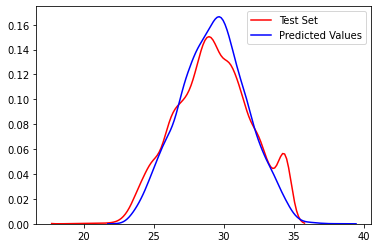

In [0]:
y_test=sc_y.inverse_transform(y_test)
y_pred=sc_y.inverse_transform(y_pred)
ax1=sns.distplot(y_test,hist=False,color='r',label='Test Set')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Values',ax=ax1)